In [5]:
import pandas as pd
import numpy as np
df= pd.read_csv(r"C:\Users\harsh\Desktop\Data Science\Day10\EDA projects\cricket_data.csv")
df

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,Mayank Markande,2,0,0,0,0,0,0,0,...,2,42,57,1,1/26,57.00,8.14,42.00,0,0
1168,2021,Mayank Markande,1,0,0,0,0.00,0,0.00,0,...,1,18,26,0,0/26,0,8.66,0,0,0
1169,2019,Mayank Markande,3,1,6,6,6.00,5,120.00,0,...,3,36,59,1,1/23,59.00,9.83,36.00,0,0
1170,2018,Mayank Markande,14,4,21,7*,10.50,24,87.50,0,...,14,264,368,15,4/23,24.53,8.36,17.60,1,0


In [8]:
!pip install numpy

In [10]:
!pip install matplotlib seaborn


In [106]:
#1. Identify and handle any missing values in the dataset.  
missing = df.isna().sum()
print("Missing values per column:")
print(missing)

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
df["Player_Name"].fillna(df["Player_Name"].mode()[0], inplace=True)


Missing values per column:
Year                      0
Player_Name               0
Matches_Batted            0
Not_Outs                  0
Runs_Scored               0
Highest_Score             0
Batting_Average           0
Balls_Faced               0
Batting_Strike_Rate       0
Centuries                 0
Half_Centuries            0
Fours                     0
Sixes                     0
Catches_Taken             0
Stumpings                 0
Matches_Bowled            0
Balls_Bowled              0
Runs_Conceded             0
Wickets_Taken             0
Bowling_Average           0
Economy_Rate              0
Bowling_Strike_Rate       0
Four_Wicket_Hauls         0
Five_Wicket_Hauls         0
Wickets_In_BBM            0
Runs_In_BBM               0
Runs_Scored_z             0
Balls_Faced_z             0
Batting_Average_z         0
Batting_Strike_Rate_z     0
Wickets_Taken_z           0
Economy_Rate_z            0
Boundary_Runs             0
Boundary_Percentage       0
Batting_Impact_Score 

C:\Users\harsh\AppData\Local\Temp\ipykernel_21988\1630789385.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21988\1630789385.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [101]:
# 2 Detect basic inconsistencies (data types, negative values, outliers)

negatives = df[num_cols][df[num_cols] < 0].dropna(how="all")
print("Rows with negative numeric values:\n", negatives)

Q1 = df["Batting_Average"].quantile(0.25)
Q3 = df["Batting_Average"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Batting_Average"] < Q1 - 1.5 * IQR)| (df["Batting_Average"] > Q3 + 1.5 * IQR)]
print("Outlier rows based on Batting_Average:\n", outliers[["Player_Name", "Year", "Batting_Average"]])


Rows with negative numeric values:
       Year  Matches_Batted  Not_Outs  Runs_Scored  Highest_Score  \
1050   NaN             NaN       NaN          NaN            NaN   
1049   NaN             NaN       NaN          NaN            NaN   
1048   NaN             NaN       NaN          NaN            NaN   
1047   NaN             NaN       NaN          NaN            NaN   
1046   NaN             NaN       NaN          NaN            NaN   
...    ...             ...       ...          ...            ...   
911    NaN             NaN       NaN          NaN            NaN   
910    NaN             NaN       NaN          NaN            NaN   
909    NaN             NaN       NaN          NaN            NaN   
908    NaN             NaN       NaN          NaN            NaN   
907    NaN             NaN       NaN          NaN            NaN   

      Batting_Average  Balls_Faced  Batting_Strike_Rate  Centuries  \
1050              NaN          NaN                  NaN        NaN   
1049   

In [102]:
# 3 Ensure all numerical columns are numeric (was done above)
print(df.dtypes)





Year                     float64
Player_Name               object
Matches_Batted           float64
Not_Outs                 float64
Runs_Scored              float64
Highest_Score            float64
Batting_Average          float64
Balls_Faced              float64
Batting_Strike_Rate      float64
Centuries                float64
Half_Centuries           float64
Fours                    float64
Sixes                    float64
Catches_Taken            float64
Stumpings                float64
Matches_Bowled           float64
Balls_Bowled             float64
Runs_Conceded            float64
Wickets_Taken            float64
Bowling_Average          float64
Economy_Rate             float64
Bowling_Strike_Rate      float64
Four_Wicket_Hauls        float64
Five_Wicket_Hauls        float64
Wickets_In_BBM           float64
Runs_In_BBM              float64
Runs_Scored_z            float64
Balls_Faced_z            float64
Batting_Average_z        float64
Batting_Strike_Rate_z    float64
Wickets_Ta

In [103]:

df.replace(['DNB', '-', 'NA', 'N/A', 'null', 'Null', 'NULL'], pd.NA, inplace=True)

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        pass 
for col in df.select_dtypes(include='object').columns:
    converted = pd.to_numeric(df[col], errors='coerce')
    if converted.notna().sum() > 0.5 * len(df):
        df[col] = converted

if 'Best_Bowling_Match' in df.columns:
    df[['Wickets_In_BBM', 'Runs_In_BBM']] = df['Best_Bowling_Match'].str.extract(r'(\d+)/(\d+)')
    df['Wickets_In_BBM'] = pd.to_numeric(df['Wickets_In_BBM'], errors='coerce')
    df['Runs_In_BBM'] = pd.to_numeric(df['Runs_In_BBM'], errors='coerce')
    df.drop(columns=['Best_Bowling_Match'], inplace=True)

print(df.dtypes)


Year                     float64
Player_Name               object
Matches_Batted           float64
Not_Outs                 float64
Runs_Scored              float64
Highest_Score            float64
Batting_Average          float64
Balls_Faced              float64
Batting_Strike_Rate      float64
Centuries                float64
Half_Centuries           float64
Fours                    float64
Sixes                    float64
Catches_Taken            float64
Stumpings                float64
Matches_Bowled           float64
Balls_Bowled             float64
Runs_Conceded            float64
Wickets_Taken            float64
Bowling_Average          float64
Economy_Rate             float64
Bowling_Strike_Rate      float64
Four_Wicket_Hauls        float64
Five_Wicket_Hauls        float64
Wickets_In_BBM           float64
Runs_In_BBM              float64
Runs_Scored_z            float64
Balls_Faced_z            float64
Batting_Average_z        float64
Batting_Strike_Rate_z    float64
Wickets_Ta

In [25]:
!pip install scikit-learn

In [34]:
# 4 Normalize / standardize selected numerical features
import pandas as pd
from sklearn.preprocessing import StandardScaler
features_to_scale = ["Runs_Scored", "Balls_Faced", "Batting_Average",
                     "Batting_Strike_Rate", "Wickets_Taken", "Economy_Rate"]
scaler = StandardScaler()
df[[f + "_z" for f in features_to_scale]] = scaler.fit_transform(df[features_to_scale])


In [30]:
# 5 Handle duplicate records
duplicates = df[df.duplicated()]
print(duplicates)



Empty DataFrame
Columns: [Year, Player_Name, Matches_Batted, Not_Outs, Runs_Scored, Highest_Score, Batting_Average, Balls_Faced, Batting_Strike_Rate, Centuries, Half_Centuries, Fours, Sixes, Catches_Taken, Stumpings, Matches_Bowled, Balls_Bowled, Runs_Conceded, Wickets_Taken, Bowling_Average, Economy_Rate, Bowling_Strike_Rate, Four_Wicket_Hauls, Five_Wicket_Hauls, Wickets_In_BBM, Runs_In_BBM, Runs_Scored_z, Balls_Faced_z, Batting_Average_z, Batting_Strike_Rate_z, Wickets_Taken_z, Economy_Rate_z]
Index: []

[0 rows x 32 columns]


In [31]:
# Count number of duplicate records
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 0


In [93]:
df_cleaned = df.drop_duplicates(subset=['Player_Name', 'Year'])
df

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Economy_Rate_z,Boundary_Runs,Boundary_Percentage,Batting_Impact_Score,All_Rounder_Index,Playing_Style,YoY_Runs_Growth,YoY_Wkts_Growth,Total_Matches,Boundaries_Total
1050,2020.0,Abdul Samad,12.0,3.0,111.0,33.0,22.20,65.0,170.76,0.0,...,1.804305,68.0,61.261261,74.935458,0.072665,Aggressive,-4.416404,-7.142857,12.0,14.0
1049,2021.0,Abdul Samad,11.0,1.0,111.0,28.0,12.33,87.0,127.58,0.0,...,0.772823,64.0,57.657658,55.892845,0.072665,Balanced,0.000000,0.000000,11.0,12.0
1048,2022.0,Abdul Samad,2.0,0.0,4.0,4.0,2.00,7.0,57.14,0.0,...,0.553825,0.0,0.000000,7.703299,0.002055,Defensive,-96.396396,-100.000000,2.0,0.0
1047,2023.0,Abdul Samad,9.0,4.0,169.0,22.0,42.25,128.0,132.03,0.0,...,-1.198161,106.0,62.721893,98.053255,0.086845,Balanced,4125.000000,-7.142857,9.0,21.0
1046,2024.0,Abdul Samad,1.0,0.0,15.0,15.0,15.00,11.0,136.36,0.0,...,-1.198161,10.0,66.666667,31.305682,0.007708,Balanced,-91.124260,-7.142857,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2020.0,Yuzvendra Chahal,15.0,1.0,1.0,1.0,1.00,3.0,33.33,0.0,...,0.352347,0.0,0.000000,3.218191,0.328639,Defensive,-83.333333,16.666667,15.0,0.0
910,2021.0,Yuzvendra Chahal,15.0,2.0,10.0,22.0,0.00,27.0,37.03,0.0,...,0.345777,0.0,0.000000,0.000000,0.286389,Defensive,900.000000,-14.285714,15.0,0.0
909,2022.0,Yuzvendra Chahal,17.0,1.0,5.0,5.0,5.00,8.0,62.50,0.0,...,0.499076,0.0,0.000000,11.603972,0.424444,Defensive,-50.000000,50.000000,17.0,0.0
908,2023.0,Yuzvendra Chahal,14.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.593245,0.0,56.410256,0.000000,0.328125,Defensive,-100.000000,-22.222222,14.0,0.0


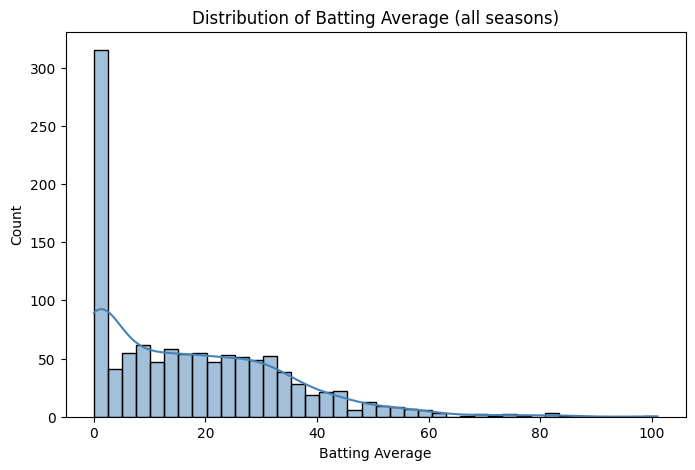

In [37]:
# 6 Distribution of Batting Average

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["Batting_Average"], kde=True, bins=40, color="steelblue")
plt.title("Distribution of Batting Average (all seasons)")
plt.xlabel("Batting Average")
plt.ylabel("Count")
plt.show()


In [38]:
# 7 Player with the highest career Batting Strike Rate

max_sr_row = df.loc[df["Batting_Strike_Rate"].idxmax()]
print(f"Highest Strike Rate: {max_sr_row['Player_Name']} ({max_sr_row['Batting_Strike_Rate']})")



Highest Strike Rate: Prerak Mankad (400.0)


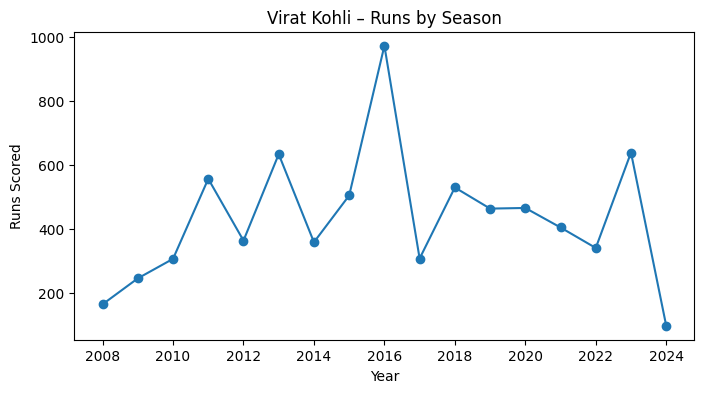

In [94]:
# 8 Trend in Runs Scored by each player over the years

runs_trend = (
    df.groupby(["Year", "Player_Name"])["Runs_Scored"]
    .sum()
    .reset_index()
    .pivot(index="Year", columns="Player_Name", values="Runs_Scored")
)

runs_trend["Virat Kohli"].plot(figsize=(8,4), marker="o", title="Virat Kohli – Runs by Season")
plt.ylabel("Runs Scored")
plt.show()



In [95]:
# 9 Top 3 players with the most Centuries

top3_cent = (df.groupby("Player_Name")["Centuries"].sum().sort_values(ascending=False).head(3))
print("Top 3 century makers:\n", top3_cent)


Top 3 century makers:
 Player_Name
Virat Kohli    7.0
Jos Buttler    5.0
KL Rahul       4.0
Name: Centuries, dtype: float64


In [96]:
# 10 Player with the highest Bowling Economy Rate

max_econ_row = df.loc[df["Economy_Rate"].idxmax()]
print(f"Hiegest Bowling Economy Rate: {max_econ_row['Player_Name']} ({max_econ_row['Economy_Rate']})")



Hiegest Bowling Economy Rate: Yashasvi Jaiswal (36.0)


In [97]:
# 11 Boundary Percentage feature

df["Boundary_Runs"] = df["Fours"] * 4 + df["Sixes"] * 6
df["Boundary_Percentage"] = (df["Boundary_Runs"] / df["Runs_Scored"].replace(0, np.nan)) * 100

df

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Economy_Rate_z,Boundary_Runs,Boundary_Percentage,Batting_Impact_Score,All_Rounder_Index,Playing_Style,YoY_Runs_Growth,YoY_Wkts_Growth,Total_Matches,Boundaries_Total
1050,2020.0,Abdul Samad,12.0,3.0,111.0,33.0,22.20,65.0,170.76,0.0,...,1.804305,68.0,61.261261,74.935458,0.072665,Aggressive,-4.416404,-7.142857,12.0,14.0
1049,2021.0,Abdul Samad,11.0,1.0,111.0,28.0,12.33,87.0,127.58,0.0,...,0.772823,64.0,57.657658,55.892845,0.072665,Balanced,0.000000,0.000000,11.0,12.0
1048,2022.0,Abdul Samad,2.0,0.0,4.0,4.0,2.00,7.0,57.14,0.0,...,0.553825,0.0,0.000000,7.703299,0.002055,Defensive,-96.396396,-100.000000,2.0,0.0
1047,2023.0,Abdul Samad,9.0,4.0,169.0,22.0,42.25,128.0,132.03,0.0,...,-1.198161,106.0,62.721893,98.053255,0.086845,Balanced,4125.000000,-7.142857,9.0,21.0
1046,2024.0,Abdul Samad,1.0,0.0,15.0,15.0,15.00,11.0,136.36,0.0,...,-1.198161,10.0,66.666667,31.305682,0.007708,Balanced,-91.124260,-7.142857,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2020.0,Yuzvendra Chahal,15.0,1.0,1.0,1.0,1.00,3.0,33.33,0.0,...,0.352347,0.0,0.000000,3.218191,0.328639,Defensive,-83.333333,16.666667,15.0,0.0
910,2021.0,Yuzvendra Chahal,15.0,2.0,10.0,22.0,0.00,27.0,37.03,0.0,...,0.345777,0.0,0.000000,0.000000,0.286389,Defensive,900.000000,-14.285714,15.0,0.0
909,2022.0,Yuzvendra Chahal,17.0,1.0,5.0,5.0,5.00,8.0,62.50,0.0,...,0.499076,0.0,0.000000,11.603972,0.424444,Defensive,-50.000000,50.000000,17.0,0.0
908,2023.0,Yuzvendra Chahal,14.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.593245,0.0,NaN,0.000000,0.328125,Defensive,-100.000000,-22.222222,14.0,0.0


In [46]:
# 12 Batting Impact Score (simple product example)

df["Batting_Impact_Score"] = (
    df["Runs_Scored"] * df["Batting_Strike_Rate"] * df["Batting_Average"]
).pow(1 / 3)  

df

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Runs_In_BBM,Runs_Scored_z,Balls_Faced_z,Batting_Average_z,Batting_Strike_Rate_z,Wickets_Taken_z,Economy_Rate_z,Boundary_Runs,Boundary_Percentage,Batting_Impact_Score
0,2024.0,Ruturaj Gaikwad,2.0,0.0,61.0,46.0,30.50,51.0,119.61,0.0,...,NaN,-0.416110,-0.387818,0.791141,0.293621,-0.701096,-1.198161,38.0,62.295082,60.599037
1,2023.0,Ruturaj Gaikwad,16.0,1.0,590.0,92.0,42.14,400.0,147.50,0.0,...,NaN,2.678271,2.458575,1.495579,0.764651,-0.701096,-1.198161,364.0,61.694915,154.210113
2,2022.0,Ruturaj Gaikwad,14.0,0.0,368.0,99.0,26.29,291.0,126.46,0.0,...,NaN,1.379684,1.569587,0.536357,0.409309,-0.701096,-1.198161,216.0,58.695652,106.954040
3,2021.0,Ruturaj Gaikwad,16.0,2.0,635.0,NaN,45.35,466.0,136.26,1.0,...,NaN,2.941498,2.996861,1.689844,0.574820,-0.701096,-1.198161,394.0,62.047244,157.727154
4,2020.0,Ruturaj Gaikwad,6.0,2.0,204.0,72.0,51.00,169.0,120.71,0.0,...,NaN,0.420367,0.574573,2.031775,0.312198,-0.701096,-1.198161,100.0,49.019608,107.890001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022.0,Mayank Markande,2.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,26.0,-0.772929,-0.803766,-1.054680,-1.726455,-0.543875,0.584485,0.0,NaN,0.000000
1168,2021.0,Mayank Markande,1.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,26.0,-0.772929,-0.803766,-1.054680,-1.726455,-0.701096,0.698364,0.0,NaN,0.000000
1169,2019.0,Mayank Markande,3.0,1.0,6.0,6.0,6.00,5.0,120.00,0.0,...,23.0,-0.737832,-0.762987,-0.691568,0.300207,-0.543875,0.954592,4.0,66.666667,16.286506
1170,2018.0,Mayank Markande,14.0,4.0,21.0,NaN,10.50,24.0,87.50,0.0,...,23.0,-0.650090,-0.608026,-0.419234,-0.248680,1.657225,0.632665,8.0,38.095238,26.820830


In [98]:
# 13 All-Rounder Index
bat_norm = (df["Runs_Scored"] - df["Runs_Scored"].min()) / (df["Runs_Scored"].max() - df["Runs_Scored"].min())
bowl_norm = (df["Wickets_Taken"] - df["Wickets_Taken"].min()) / (df["Wickets_Taken"].max() - df["Wickets_Taken"].min())
df["All_Rounder_Index"] = (bat_norm + bowl_norm) / 2
df


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Economy_Rate_z,Boundary_Runs,Boundary_Percentage,Batting_Impact_Score,All_Rounder_Index,Playing_Style,YoY_Runs_Growth,YoY_Wkts_Growth,Total_Matches,Boundaries_Total
1050,2020.0,Abdul Samad,12.0,3.0,111.0,33.0,22.20,65.0,170.76,0.0,...,1.804305,68.0,61.261261,74.935458,0.072665,Aggressive,-4.416404,-7.142857,12.0,14.0
1049,2021.0,Abdul Samad,11.0,1.0,111.0,28.0,12.33,87.0,127.58,0.0,...,0.772823,64.0,57.657658,55.892845,0.072665,Balanced,0.000000,0.000000,11.0,12.0
1048,2022.0,Abdul Samad,2.0,0.0,4.0,4.0,2.00,7.0,57.14,0.0,...,0.553825,0.0,0.000000,7.703299,0.002055,Defensive,-96.396396,-100.000000,2.0,0.0
1047,2023.0,Abdul Samad,9.0,4.0,169.0,22.0,42.25,128.0,132.03,0.0,...,-1.198161,106.0,62.721893,98.053255,0.086845,Balanced,4125.000000,-7.142857,9.0,21.0
1046,2024.0,Abdul Samad,1.0,0.0,15.0,15.0,15.00,11.0,136.36,0.0,...,-1.198161,10.0,66.666667,31.305682,0.007708,Balanced,-91.124260,-7.142857,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2020.0,Yuzvendra Chahal,15.0,1.0,1.0,1.0,1.00,3.0,33.33,0.0,...,0.352347,0.0,0.000000,3.218191,0.328639,Defensive,-83.333333,16.666667,15.0,0.0
910,2021.0,Yuzvendra Chahal,15.0,2.0,10.0,22.0,0.00,27.0,37.03,0.0,...,0.345777,0.0,0.000000,0.000000,0.286389,Defensive,900.000000,-14.285714,15.0,0.0
909,2022.0,Yuzvendra Chahal,17.0,1.0,5.0,5.0,5.00,8.0,62.50,0.0,...,0.499076,0.0,0.000000,11.603972,0.424444,Defensive,-50.000000,50.000000,17.0,0.0
908,2023.0,Yuzvendra Chahal,14.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.593245,0.0,NaN,0.000000,0.328125,Defensive,-100.000000,-22.222222,14.0,0.0


In [99]:
# 14 Playing Style category from Strike Rate

def label_style(sr):
    if sr >= 140:
        return "Aggressive"
    elif sr >= 110:
        return "Balanced"
    else:
        return "Defensive"

df["Playing_Style"] = df["Batting_Strike_Rate"].apply(label_style)
df


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Economy_Rate_z,Boundary_Runs,Boundary_Percentage,Batting_Impact_Score,All_Rounder_Index,Playing_Style,YoY_Runs_Growth,YoY_Wkts_Growth,Total_Matches,Boundaries_Total
1050,2020.0,Abdul Samad,12.0,3.0,111.0,33.0,22.20,65.0,170.76,0.0,...,1.804305,68.0,61.261261,74.935458,0.072665,Aggressive,-4.416404,-7.142857,12.0,14.0
1049,2021.0,Abdul Samad,11.0,1.0,111.0,28.0,12.33,87.0,127.58,0.0,...,0.772823,64.0,57.657658,55.892845,0.072665,Balanced,0.000000,0.000000,11.0,12.0
1048,2022.0,Abdul Samad,2.0,0.0,4.0,4.0,2.00,7.0,57.14,0.0,...,0.553825,0.0,0.000000,7.703299,0.002055,Defensive,-96.396396,-100.000000,2.0,0.0
1047,2023.0,Abdul Samad,9.0,4.0,169.0,22.0,42.25,128.0,132.03,0.0,...,-1.198161,106.0,62.721893,98.053255,0.086845,Balanced,4125.000000,-7.142857,9.0,21.0
1046,2024.0,Abdul Samad,1.0,0.0,15.0,15.0,15.00,11.0,136.36,0.0,...,-1.198161,10.0,66.666667,31.305682,0.007708,Balanced,-91.124260,-7.142857,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2020.0,Yuzvendra Chahal,15.0,1.0,1.0,1.0,1.00,3.0,33.33,0.0,...,0.352347,0.0,0.000000,3.218191,0.328639,Defensive,-83.333333,16.666667,15.0,0.0
910,2021.0,Yuzvendra Chahal,15.0,2.0,10.0,22.0,0.00,27.0,37.03,0.0,...,0.345777,0.0,0.000000,0.000000,0.286389,Defensive,900.000000,-14.285714,15.0,0.0
909,2022.0,Yuzvendra Chahal,17.0,1.0,5.0,5.0,5.00,8.0,62.50,0.0,...,0.499076,0.0,0.000000,11.603972,0.424444,Defensive,-50.000000,50.000000,17.0,0.0
908,2023.0,Yuzvendra Chahal,14.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.593245,0.0,NaN,0.000000,0.328125,Defensive,-100.000000,-22.222222,14.0,0.0


In [108]:
# 15 Year-over-Year growth in Runs Scored & Wickets_Taken
# ------------------------------------------------------------------
df.sort_values(["Player_Name", "Year"], inplace=True)
df["YoY_Runs_Growth"] = (
    df.groupby("Player_Name")["Runs_Scored"].pct_change() * 100
)
df["YoY_Wkts_Growth"] = (
    df.groupby("Player_Name")["Wickets_Taken"].pct_change() * 100
)
df


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Economy_Rate_z,Boundary_Runs,Boundary_Percentage,Batting_Impact_Score,All_Rounder_Index,Playing_Style,YoY_Runs_Growth,YoY_Wkts_Growth,Total_Matches,Boundaries_Total
1050,2020.0,Abdul Samad,12.0,3.0,111.0,33.0,22.20,65.0,170.76,0.0,...,1.804305,68.0,61.261261,74.935458,0.072665,Aggressive,NaN,NaN,12.0,14.0
1049,2021.0,Abdul Samad,11.0,1.0,111.0,28.0,12.33,87.0,127.58,0.0,...,0.772823,64.0,57.657658,55.892845,0.072665,Balanced,0.000000,0.000000,11.0,12.0
1048,2022.0,Abdul Samad,2.0,0.0,4.0,4.0,2.00,7.0,57.14,0.0,...,0.553825,0.0,0.000000,7.703299,0.002055,Defensive,-96.396396,-100.000000,2.0,0.0
1047,2023.0,Abdul Samad,9.0,4.0,169.0,22.0,42.25,128.0,132.03,0.0,...,-1.198161,106.0,62.721893,98.053255,0.086845,Balanced,4125.000000,NaN,9.0,21.0
1046,2024.0,Abdul Samad,1.0,0.0,15.0,15.0,15.00,11.0,136.36,0.0,...,-1.198161,10.0,66.666667,31.305682,0.007708,Balanced,-91.124260,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2020.0,Yuzvendra Chahal,15.0,1.0,1.0,1.0,1.00,3.0,33.33,0.0,...,0.352347,0.0,0.000000,3.218191,0.328639,Defensive,-83.333333,16.666667,15.0,0.0
910,2021.0,Yuzvendra Chahal,15.0,2.0,10.0,22.0,0.00,27.0,37.03,0.0,...,0.345777,0.0,0.000000,0.000000,0.286389,Defensive,900.000000,-14.285714,15.0,0.0
909,2022.0,Yuzvendra Chahal,17.0,1.0,5.0,5.0,5.00,8.0,62.50,0.0,...,0.499076,0.0,0.000000,11.603972,0.424444,Defensive,-50.000000,50.000000,17.0,0.0
908,2023.0,Yuzvendra Chahal,14.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.593245,0.0,57.142857,0.000000,0.328125,Defensive,-100.000000,-22.222222,14.0,0.0


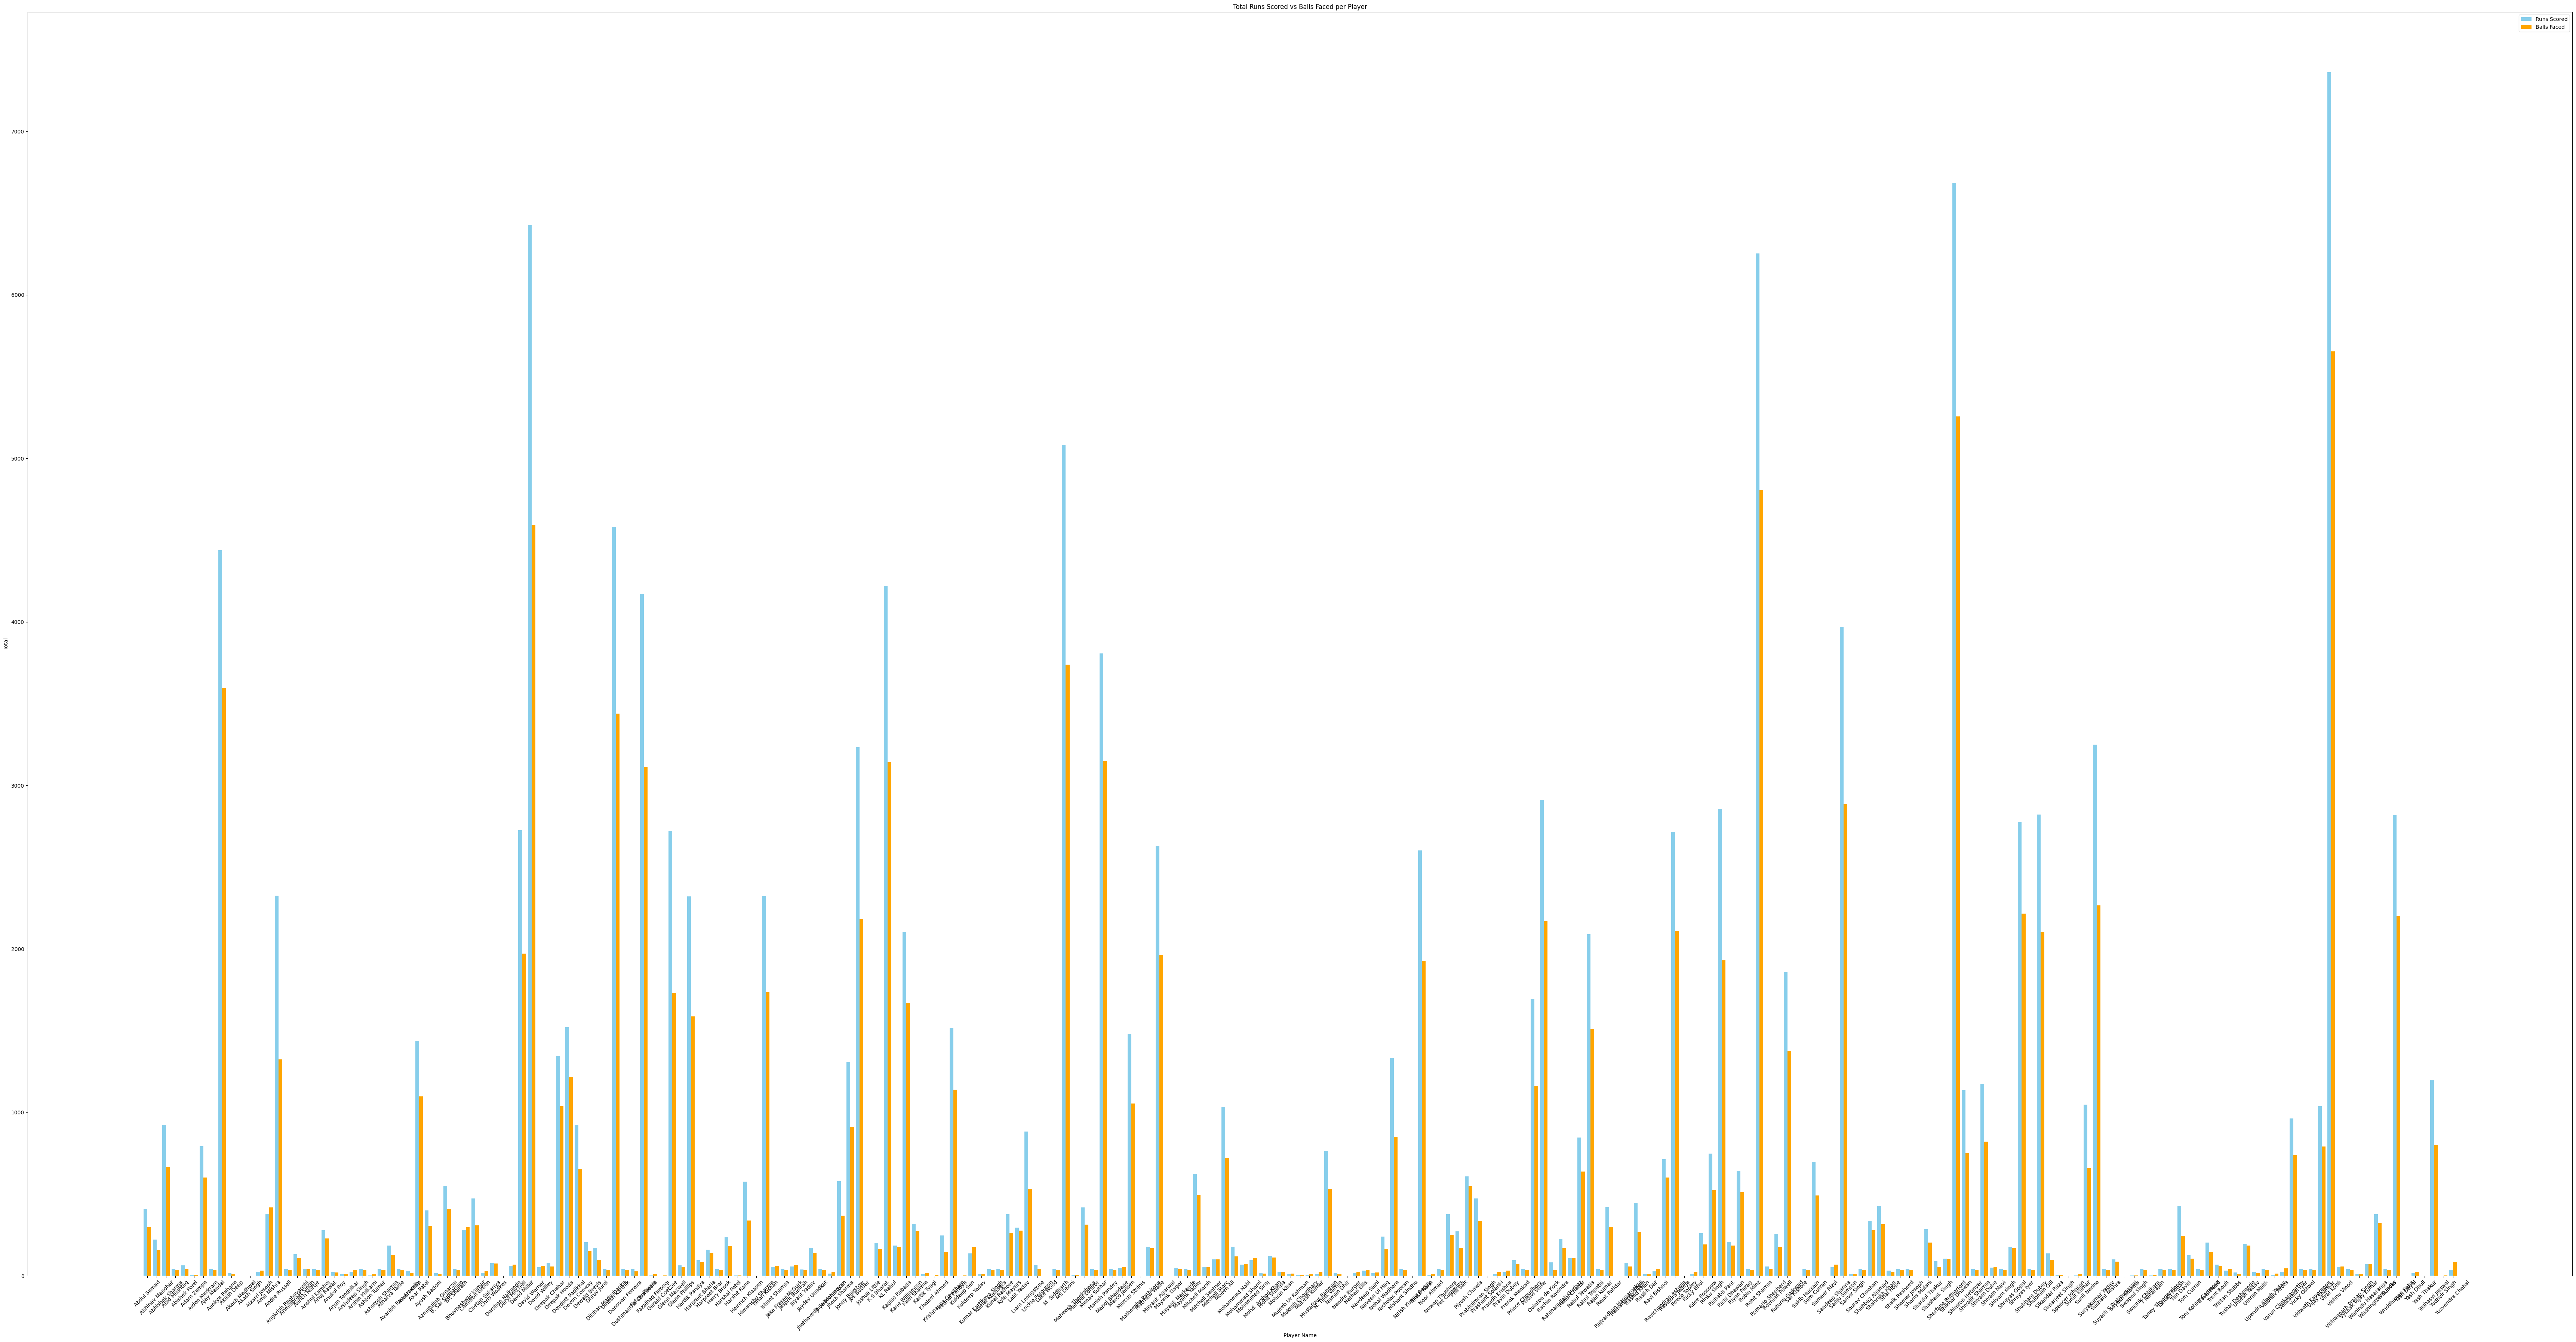

In [111]:
#15. Compute the year-over-year growth in performance metrics for each player.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total runs and balls faced per player
grouped = df.groupby("Player_Name")[["Runs_Scored", "Balls_Faced"]].sum().reset_index()

# Plot bar chart: Runs vs Balls Faced for each player
plt.figure(figsize=(69,36))
bar_width = 0.4
x = range(len(grouped))

plt.bar(x, grouped["Runs_Scored"], width=bar_width, label="Runs Scored", color="skyblue")
plt.bar([i + bar_width for i in x], grouped["Balls_Faced"], width=bar_width, label="Balls Faced", color="orange")

# Labels and ticks
plt.xlabel("Player Name")
plt.ylabel("Total")
plt.title("Total Runs Scored vs Balls Faced per Player")
plt.xticks([i + bar_width / 2 for i in x], grouped["Player_Name"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


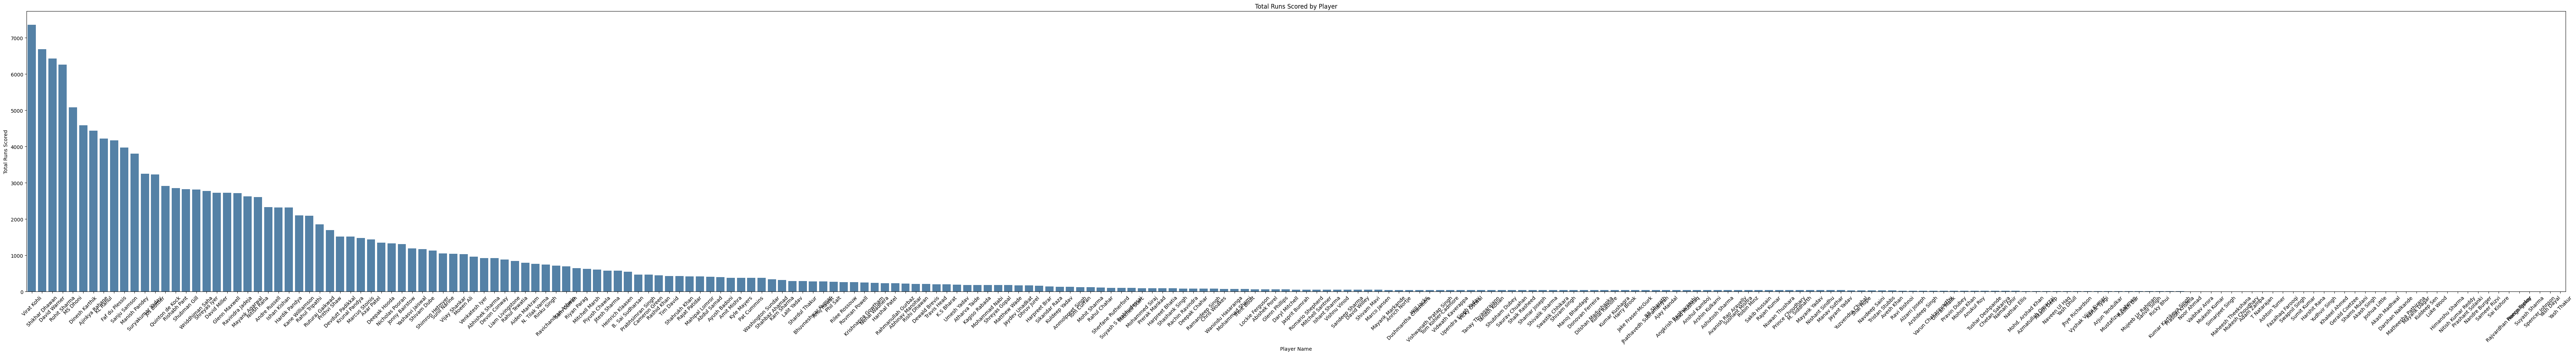

In [110]:
#16. Create a bar chart to show the Runs Scored vs. Balls Faced for all players. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate data by player
agg_df = df.groupby("Player_Name")[["Runs_Scored", "Balls_Faced"]].sum().reset_index()

# Step 2: Set figure size
plt.figure(figsize=(72,10))

# Step 3: Create bar chart (you can swap x and y if needed)
sns.barplot(data=agg_df.sort_values("Runs_Scored", ascending=False), 
            x="Player_Name", 
            y="Runs_Scored", 
            color="steelblue")

# Step 4: Customize chart
plt.title("Total Runs Scored by Player")
plt.xlabel("Player Name")
plt.ylabel("Total Runs Scored")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


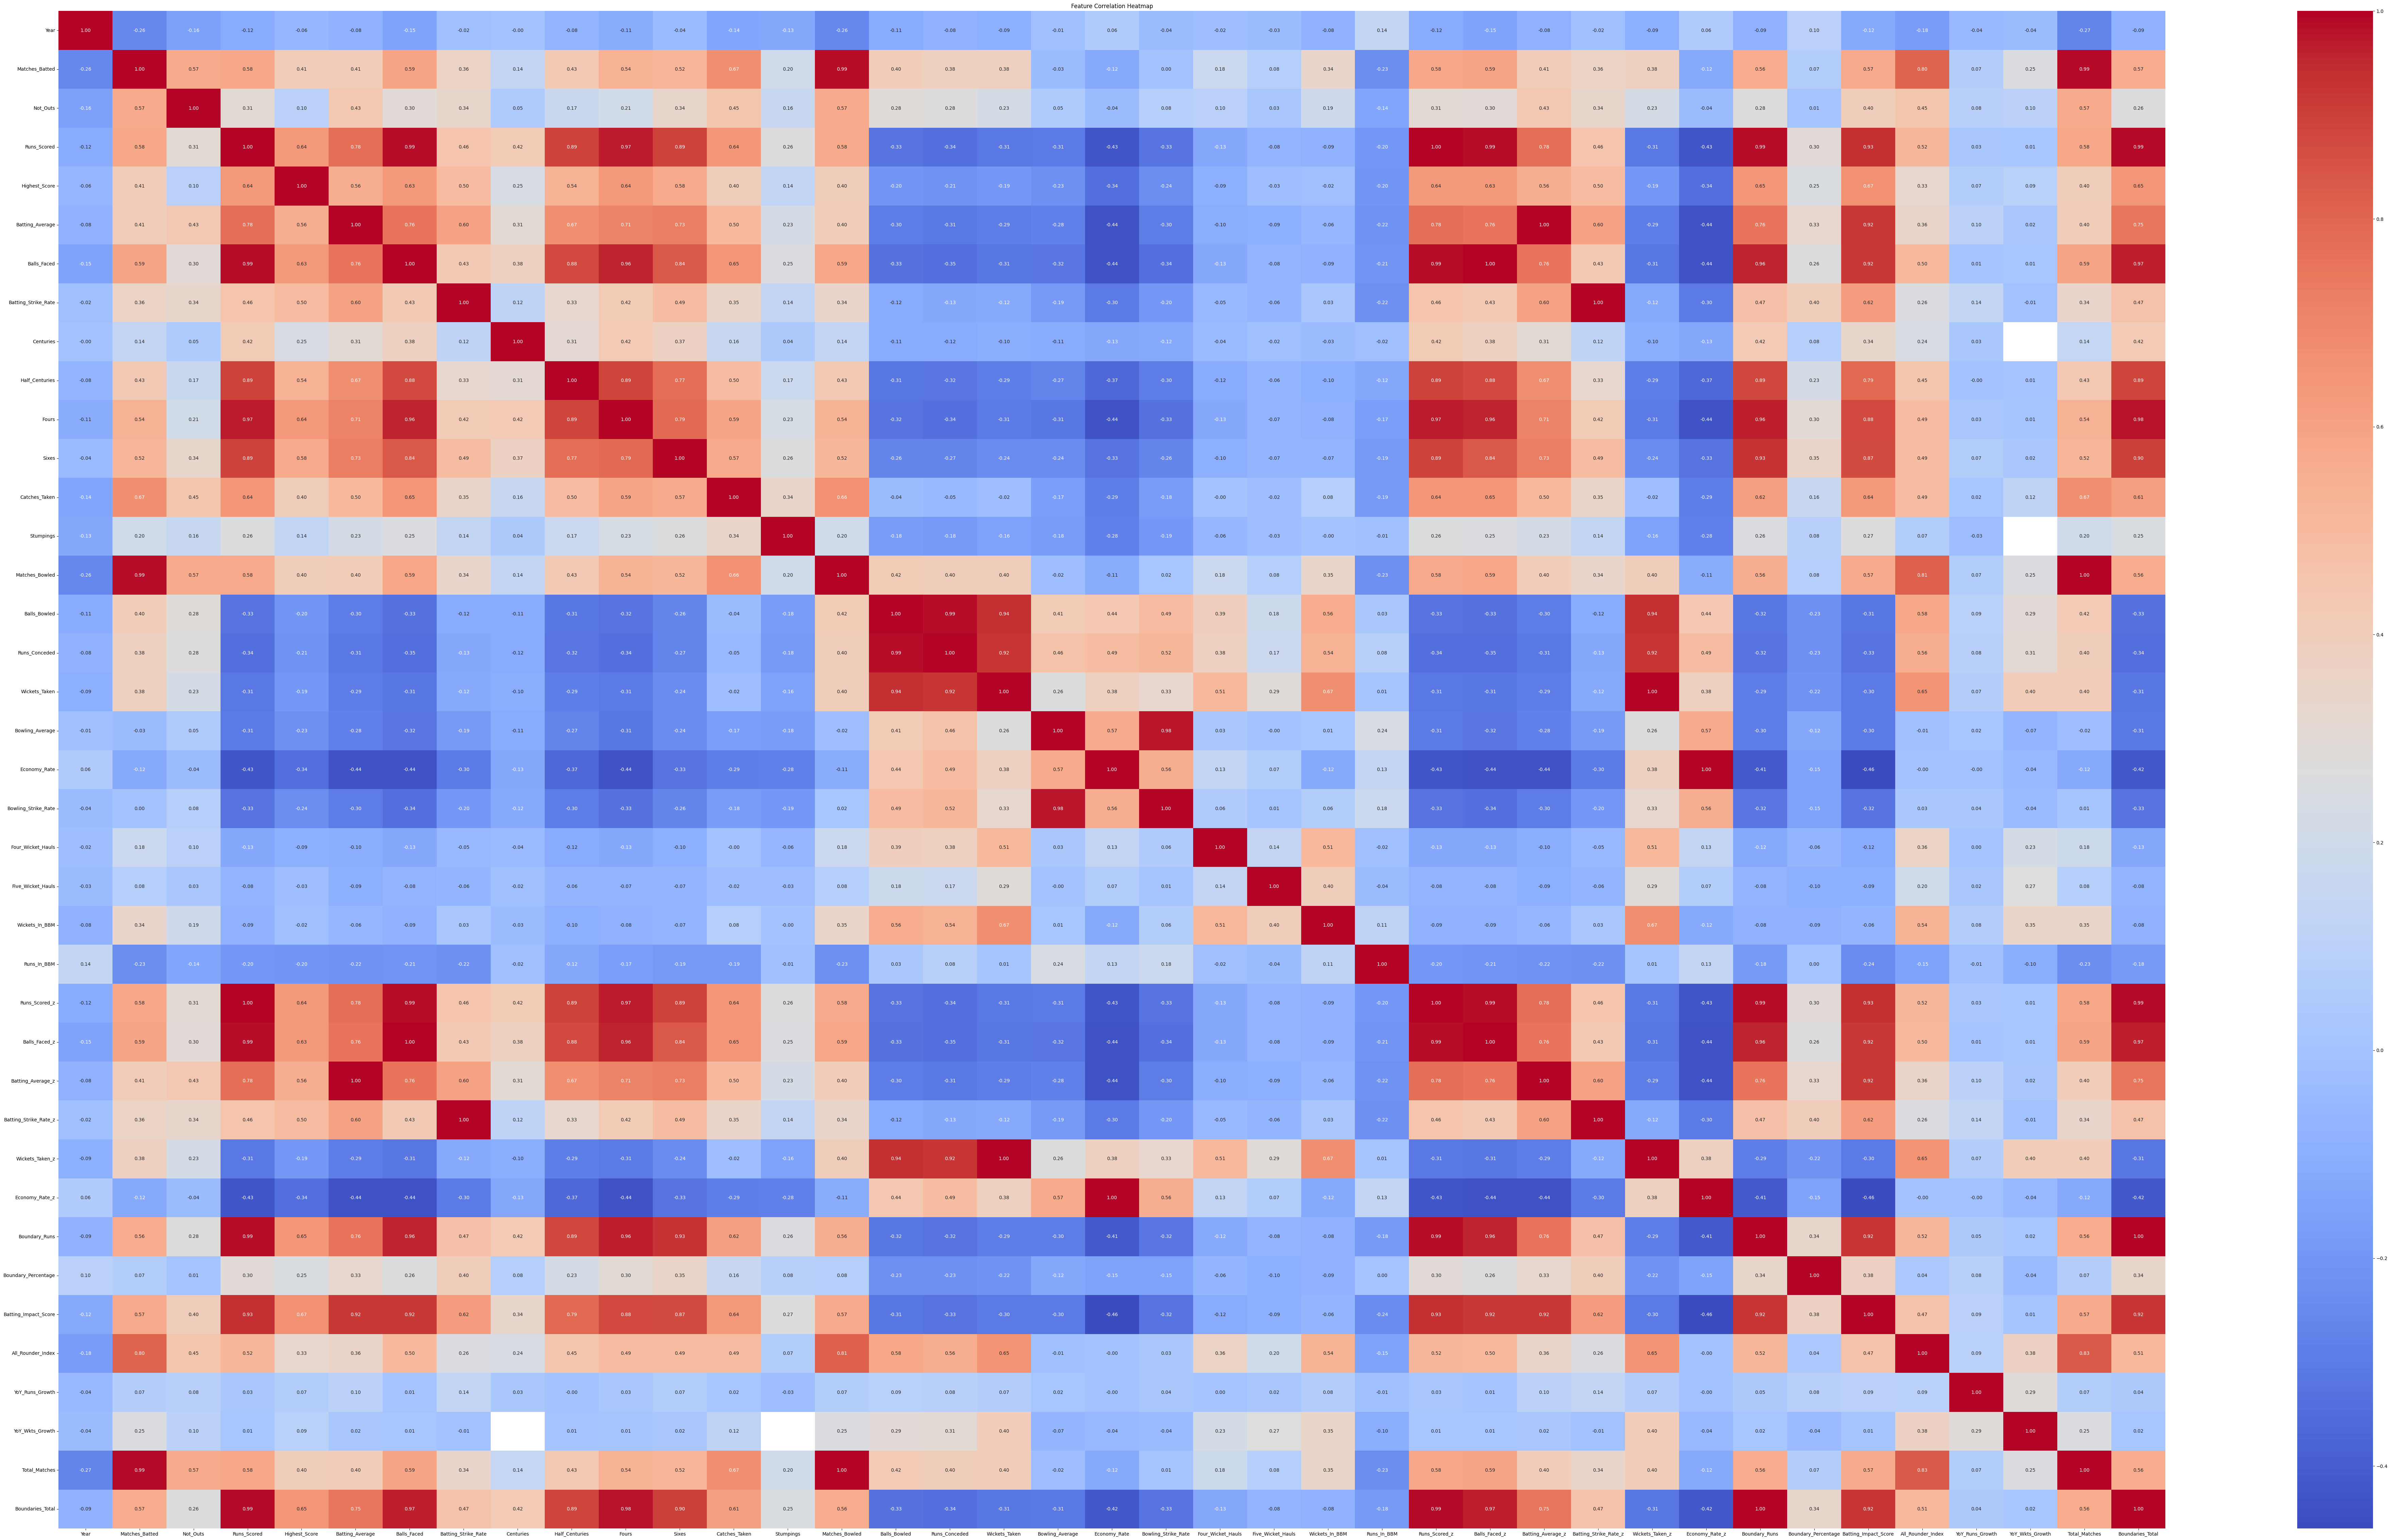

In [109]:
#17. Generate a heatmap showing the correlation between different numerical features.
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns

corr_mat = df[num_cols].corr()

if corr_mat.empty:
    print("No numeric columns found to compute correlation.")
else:
    plt.figure(figsize=(100,58))
    sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()


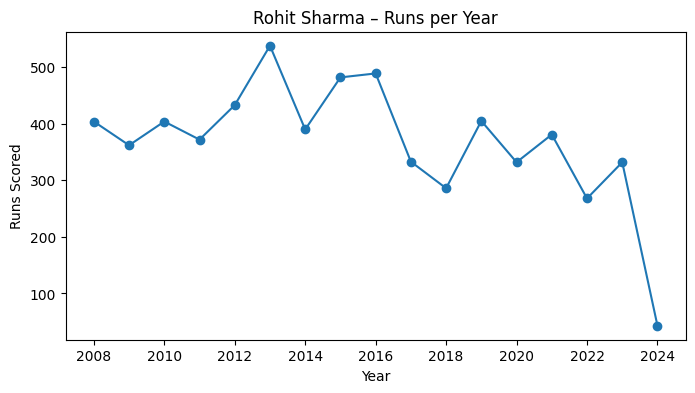

In [112]:
# 18 Trend line of a single player (e.g., Rohit Sharma Runs per year)
(df[df["Player_Name"] == "Rohit Sharma"].set_index("Year")["Runs_Scored"].plot(marker="o", figsize=(8,4), title="Rohit Sharma – Runs per Year"))
plt.ylabel("Runs Scored")
plt.show()


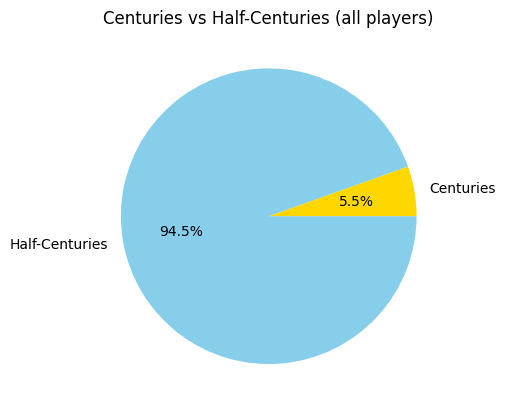

In [113]:
# 19 Pie chart – Centuries vs Half-Centuries distribution
tot_cent = df["Centuries"].sum()
tot_half = df["Half_Centuries"].sum()
plt.pie([tot_cent, tot_half], labels=["Centuries", "Half-Centuries"],
        autopct="%1.1f%%", colors=["gold", "skyblue"])
plt.title("Centuries vs Half-Centuries (all players)")
plt.show()


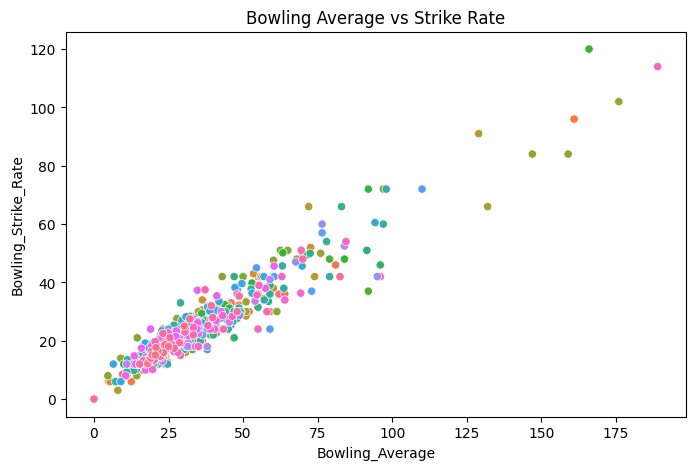

In [114]:
# 20 Scatter – Bowling Average vs Bowling Strike Rate
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Bowling_Average", y="Bowling_Strike_Rate",
                hue="Player_Name", legend=False)
plt.title("Bowling Average vs Strike Rate")
plt.show()



In [115]:
# 21 Top 5 players by overall Batting Average
batavg = (df.groupby("Player_Name")["Batting_Average"].mean().sort_values(ascending=False).head(5))
print("Top 5 overall batting averages:\n", batavg)



Top 5 overall batting averages:
 Player_Name
Devon Conway        46.845000
B. Sai Sudharsan    44.320000
KL Rahul            43.098182
Rachin Ravindra     41.500000
Phil Salt           40.625000
Name: Batting_Average, dtype: float64


In [116]:
# 22 Player with most career matches (bat OR bowl)
df["Total_Matches"] = df[["Matches_Batted", "Matches_Bowled"]].max(axis=1)
most_matches = (df.groupby("Player_Name")["Total_Matches"].sum().sort_values(ascending=False).head(1))
print("Most matches played:\n", most_matches)


Most matches played:
 Player_Name
MS Dhoni    252.0
Name: Total_Matches, dtype: float64


In [117]:
# 23 Players scoring > 500 runs in a single season
big_seasons = df[df["Runs_Scored"] > 500][["Year", "Player_Name", "Runs_Scored"]]
print(big_seasons)



       Year       Player_Name  Runs_Scored
36   2012.0    Ajinkya Rahane        560.0
33   2015.0    Ajinkya Rahane        540.0
418  2019.0     Andre Russell        510.0
133  2014.0      David Warner        528.0
132  2015.0      David Warner        562.0
131  2016.0      David Warner        848.0
130  2017.0      David Warner        641.0
129  2019.0      David Warner        692.0
128  2020.0      David Warner        548.0
125  2023.0      David Warner        516.0
5    2023.0      Devon Conway        672.0
970  2013.0    Dinesh Karthik        510.0
926  2021.0    Faf du Plessis        633.0
924  2023.0    Faf du Plessis        730.0
989  2014.0     Glenn Maxwell        552.0
983  2021.0     Glenn Maxwell        513.0
615  2020.0      Ishan Kishan        516.0
820  2018.0       Jos Buttler        548.0
816  2022.0       Jos Buttler        863.0
473  2018.0          KL Rahul        659.0
472  2019.0          KL Rahul        593.0
471  2020.0          KL Rahul        670.0
470  2021.0

In [78]:
# 24 Players with at least one 5-wicket haul

five_fors = df[df["Five_Wicket_Hauls"] > 0]["Player_Name"].unique()
print("5-wicket haul achievers:", five_fors)


5-wicket haul achievers: ['Adam Zampa' 'Akash Madhwal' 'Alzarri Joseph' 'Amit Mishra'
 'Andre Russell' 'Arshdeep Singh' 'Bhuvneshwar Kumar' 'Harshal Patel'
 'Ishant Sharma' 'Jasprit Bumrah' 'Jaydev Unadkat' 'Mohit Sharma'
 'Ravindra Jadeja' 'Sunil Narine' 'Umran Malik' 'Varun Chakaravarthy'
 'Wanindu Hasaranga' 'Yuzvendra Chahal']


In [118]:
# 25 Total boundaries (fours + sixes) hit by each player

df["Boundaries_Total"] = df["Fours"] + df["Sixes"]
tb = (df.groupby("Player_Name")["Boundaries_Total"].sum().sort_values(ascending=False))
print(tb)

Player_Name
Shikhar Dhawan      908.0
Virat Kohli         891.0
David Warner        877.0
Rohit Sharma        819.0
Dinesh Karthik      588.0
                    ...  
Vaibhav Arora         0.0
Yash Dayal            0.0
Yash Thakur           0.0
Yudhvir Singh         0.0
Yuzvendra Chahal      0.0
Name: Boundaries_Total, Length: 247, dtype: float64
